For this problem we will use the dataset wages.csv. This dataset contains information on about 300 American workers. 
It includes their average monthly wage (wage), gender (male) and completed years of formal education (educ). 
You suspect that people with higher educational attainment earn more on average.

In [17]:
library(tidyverse)
library(haven)
library(ggplot2)

# read the dataset
data<-read.csv("https://raw.githubusercontent.com/ds-modules/ECON-140-FA22-RDE/main/Sections/103-Daniela/wages.csv")

In [4]:
# check variable names and first observations/cells to understand the dataset
colnames(data)
head(data)


[1] "male" "wage" "educ"

,male,wage,educ
,<dbl>,<dbl>,<dbl>
1,1,3284.233,12
2,1,2994.763,12
3,0,2078.706,9
4,0,1679.675,5
5,1,2633.824,6
6,0,1108.678,5


In [5]:
# how many observations and variables are in the dataset? 
dim(data)


[1] 300   3

      male             wage           educ      
 Min.   :0.0000   Min.   :   0   Min.   : 4.00  
 1st Qu.:0.0000   1st Qu.:1697   1st Qu.: 7.00  
 Median :1.0000   Median :2370   Median : 9.00  
 Mean   :0.5567   Mean   :2383   Mean   : 9.62  
 3rd Qu.:1.0000   3rd Qu.:3083   3rd Qu.:12.00  
 Max.   :1.0000   Max.   :4898   Max.   :16.00  

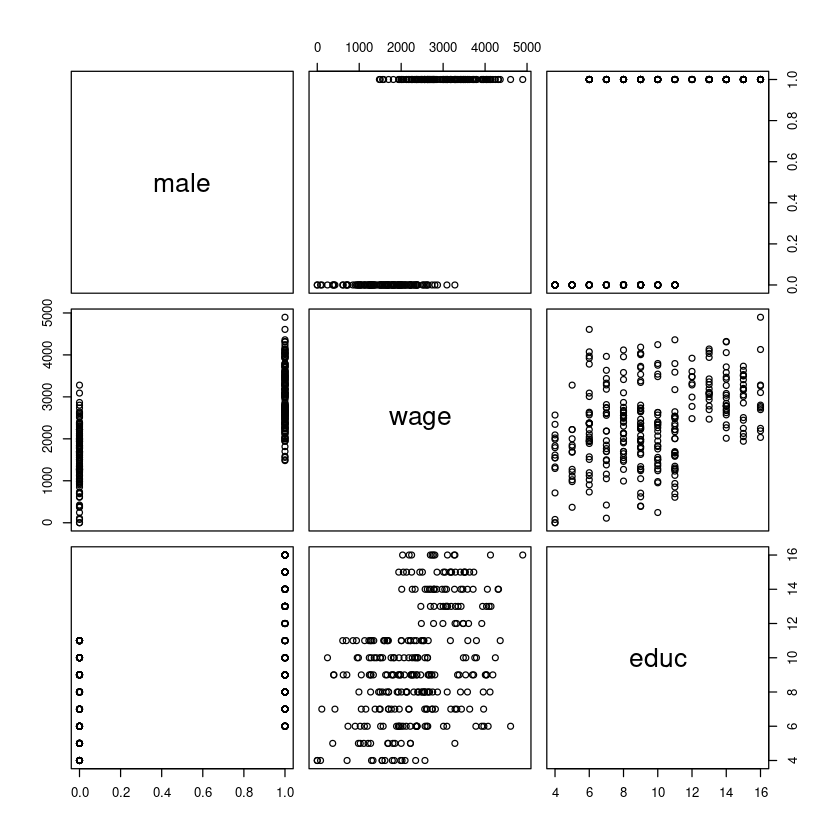

In [16]:
# how would you characterize this dataset (think about the sample, unit of analysis, time frame, etc)? 
# View(data)
summary(data)
plot(data)

In [7]:
## are any values missing?
# View(data)
is.na(data)
data[!complete.cases(data),]

male,wage,educ
FALSE,FALSE,FALSE
FALSE,FALSE,FALSE
FALSE,FALSE,FALSE
FALSE,FALSE,FALSE
FALSE,FALSE,FALSE
FALSE,FALSE,FALSE
FALSE,FALSE,FALSE
FALSE,FALSE,FALSE
FALSE,FALSE,FALSE
FALSE,FALSE,FALSE


male,wage,educ
<dbl>,<dbl>,<dbl>


In [ ]:
# are any of the columns categorical?
View(data)

In [ ]:
## extra: how do you transform a categorical variable into a continuous one?


In [8]:
## what is the proportion of male? 
mean(data$male)

[1] 0.5566667

In [9]:
## what is the mean of the education variable? 
summary(data$educ)
mean(data$educ)

round(mean(data$educ),1)



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4.00    7.00    9.00    9.62   12.00   16.00 

[1] 9.62

[1] 9.6

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    1697    2370    2383    3083    4898 

[1] 964.1753

[1] 964.18

In [ ]:
## what is the standard deviation of wage? 
summary(data$wage)
sd(data$wage)

round(sd(data$wage),2)

In [ ]:
## extra: do you see outliers? What would you do with outliers in wage? 


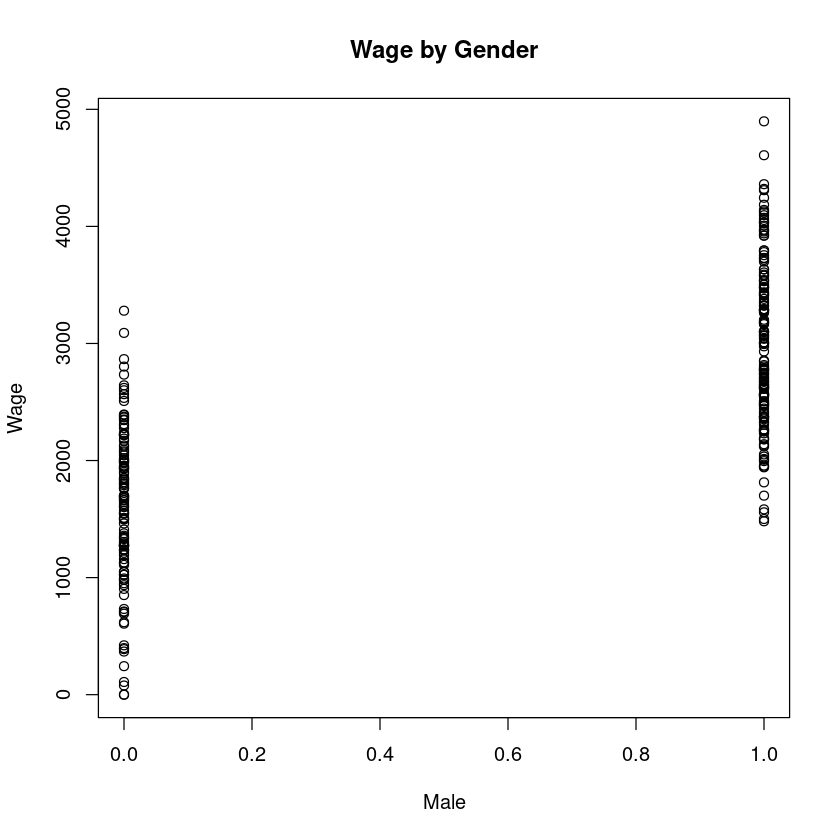

In [10]:
## plot a scatter diagram of the average monthly wage against the male dummy. 


## scatter plot of wage and gender
x <- data$male
y <- data$wage

plot(x, y, main = "Wage by Gender",
     xlab = "Male", ylab = "Wage",
     pch = 1)


In [ ]:
## what differences do you see? Explain. 

In [11]:
## run linear model that regresses wage on gender

wage_male  <- lm(wage~male, data)
summary(wage_male)
print(wage_male)


Call:
lm(formula = wage ~ male, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1616.23  -453.48    13.84   478.17  1904.41 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1616.23      58.92   27.43   <2e-16 ***
male         1376.89      78.97   17.43   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 679.5 on 298 degrees of freedom
Multiple R-squared:  0.505,	Adjusted R-squared:  0.5033 
F-statistic:   304 on 1 and 298 DF,  p-value: < 2.2e-16



Call:
lm(formula = wage ~ male, data = data)

Coefficients:
(Intercept)         male  
       1616         1377  



In [12]:
## how do you interpret the coefficients (see section slides or class 4 takeaways)? 

mean(data[data$male==0, "wage"])
mean(data[data$male==1, "wage"])




[1] 1616.227

[1] 2993.12

[1] 7.766917

[1] 11.09581

In [ ]:
## is this evidence of discrimination or something else? How would you test this? 

mean(data[data$male==0, "educ"])
mean(data[data$male==1, "educ"])

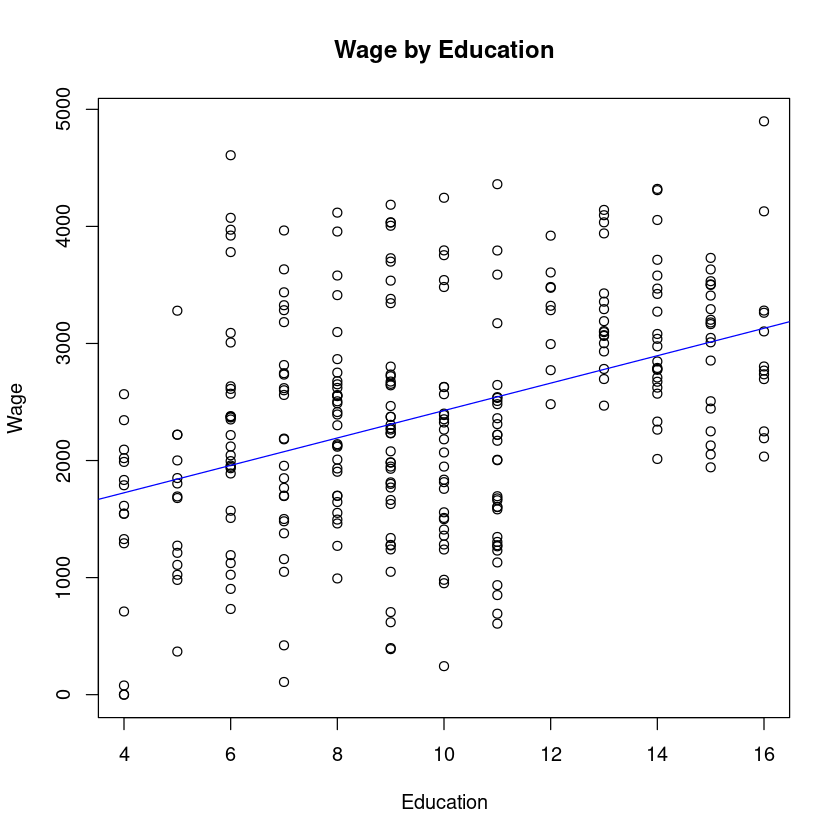

In [13]:
## let's repeat the exercise and now create a scatter plot of wage and education
x_2 <- data$educ
y <- data$wage

plot(x_2, y, main = "Wage by Education",
     xlab = "Education", ylab = "Wage",
     pch = 1)
abline(lm(y ~ x_2, data = data), col = "blue")

In [14]:
## let's perform a linear model that regresses wage on education
wage_educ        <- lm(wage~educ, data)
summary(wage_educ)
print(wage_educ)



Call:
lm(formula = wage ~ educ, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2183.61  -570.57   -25.54   492.21  2649.19 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1256.17     157.92   7.954 3.78e-14 ***
educ          117.10      15.53   7.539 5.74e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 885.1 on 298 degrees of freedom
Multiple R-squared:  0.1602,	Adjusted R-squared:  0.1574 
F-statistic: 56.83 on 1 and 298 DF,  p-value: 5.744e-13



Call:
lm(formula = wage ~ educ, data = data)

Coefficients:
(Intercept)         educ  
     1256.2        117.1  



In [ ]:


## how do you interpret the constant in this case? (see section slides or class 4 takeaways)

## how do you interpret the effect on the education variable?

## extra: how would you change this model to evaluate the theory of the "diploma effect" ?

## do you think our regressions reflects the causal effect of schooling on wages ? (think about cofounders, sampling strategy, outliers)




In [ ]:
## run linear model that regresses wage on all variables
wage_all        <- lm(wage~., data)
summary(wage_all)
print(wage_all)


In [ ]:
## final discussion of section 2: let's come back to think how to measure discrimination and returns to education


## Ggplot
(good resource: https://datacarpentry.org/R-ecology-lesson/04-visualization-ggplot2.html)

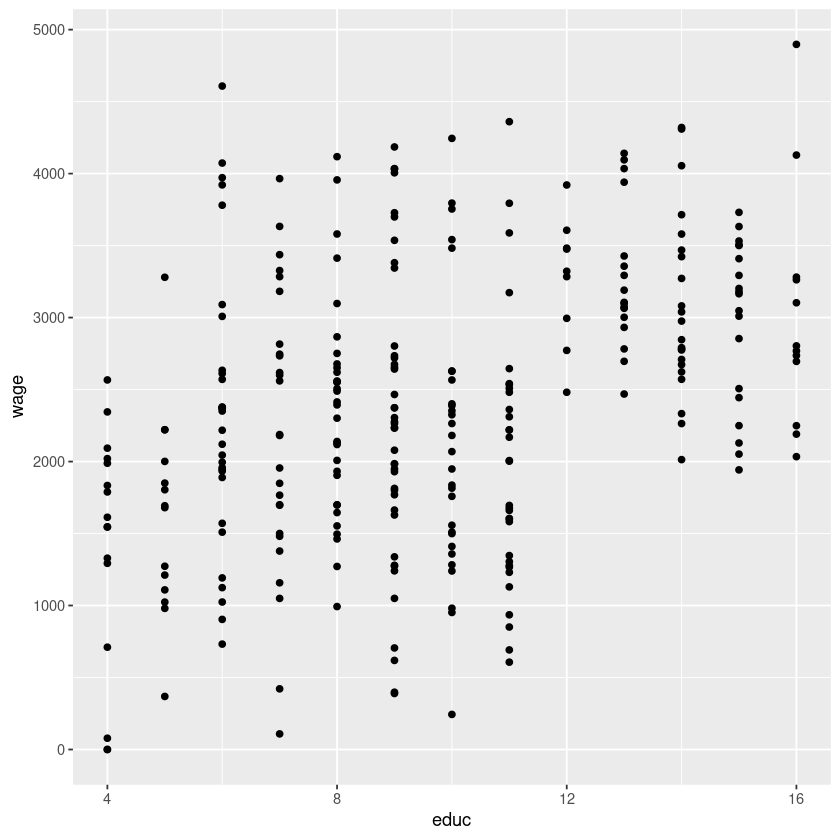

In [18]:
ggplot(data = data, aes(x = educ, y = wage)) +
  geom_point()

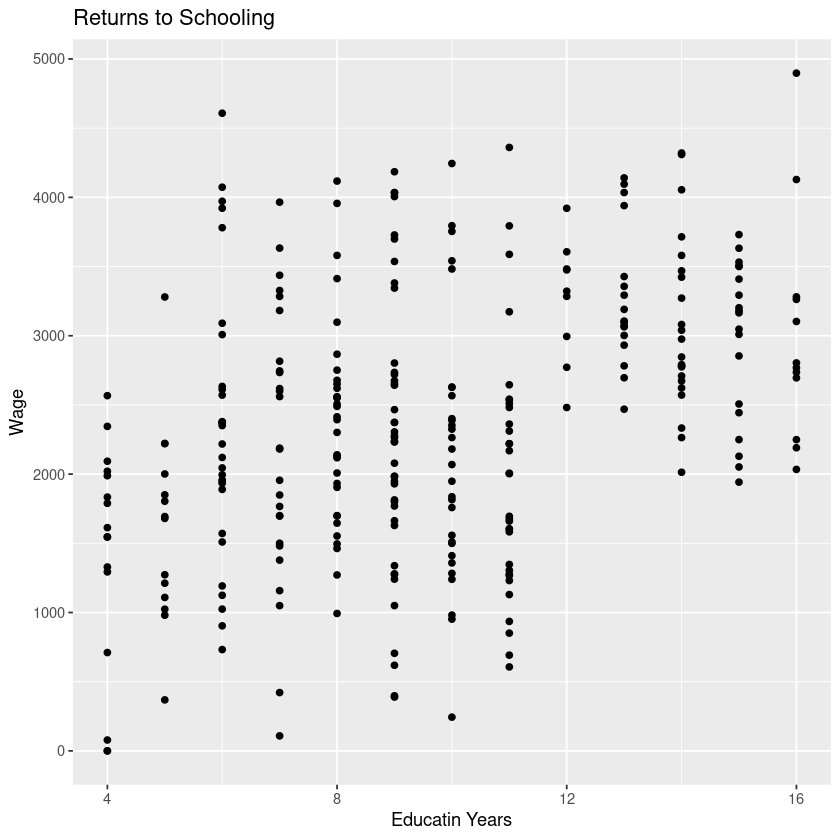

In [26]:
ggplot(data = data, aes(x = educ, y = wage)) +
  geom_point() +
    labs(title = "Returns to Schooling",
        x = "Education Years",
        y = "Wage") 

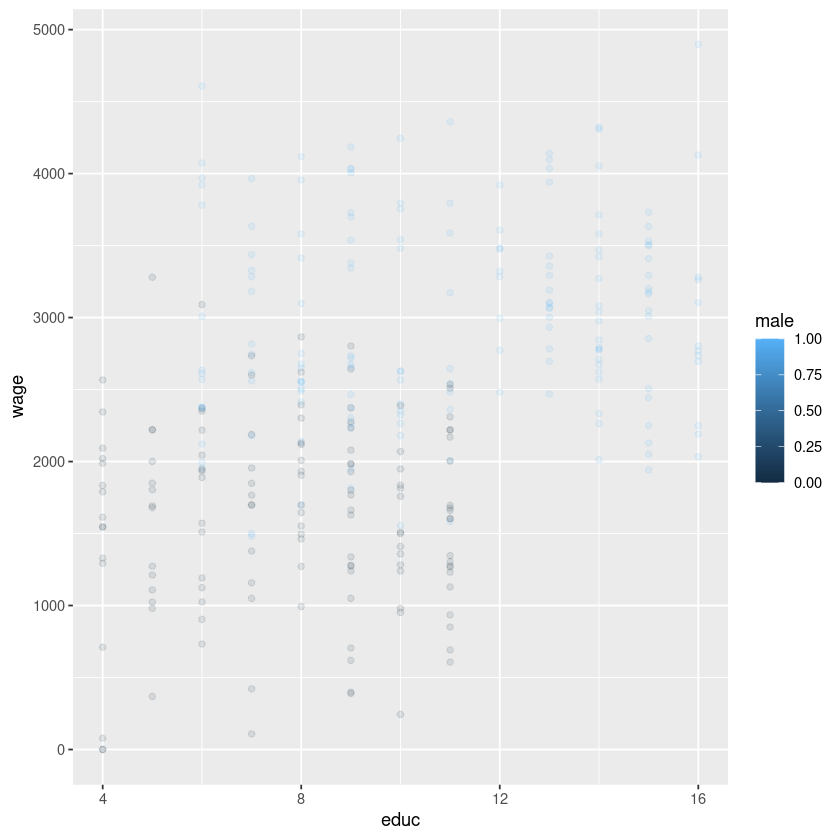

In [22]:
ggplot(data = data, aes(x = educ, y = wage)) +
    geom_point(alpha = 0.1, aes(color = male))


## Replicating figures of a paper
Trafficking Networks and the Mexican Drug War by Melissa Dell
(example in R in computer)

## Faceting 
Using climate data. ggplot has a special technique called faceting that allows the user to split one plot into multiple plots based on a factor included in the dataset

## Replicating tables of a paper: stargazer

## Resources:
regressions: https://cran.r-project.org/doc/contrib/Faraway-PRA.pdf
dplyr: https://www.rstudio.com/wp-content/uploads/2015/02/data-wrangling-cheatsheet.pdf